In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\seema sagar\Downloads\car.data", header=None)

### Exploratory data analysis

Now we will explore the insight about the data

In [5]:
df.shape

(1728, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
col_names = ['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']
df.columns = col_names  # Assign new column name
col_names    # Confirm column names



['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']

In [9]:
df.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
for col in col_names:
    print(df[col].value_counts())
  


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: person, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [11]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

#### Missing values

In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

#### Declare feature vector and target variable

In [13]:
x=df.drop(['class'], axis=1)
y=df['class']

#### split data into separate tarining and test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)


In [15]:
x_train.shape, x_test.shape

((1209, 6), (519, 6))

#### Feature engineering  :  is process of transforming raw data into features that help us to understand our model better  and increase the predictive power. I will carry our feature engineering on different type of varible

In [16]:
#check the dtype of x_train

x_train.dtypes

buying      object
maint       object
doors       object
person      object
lug_boot    object
safety      object
dtype: object

#### Encode categorical variable

In [17]:
x_train.head()

,buying,maint,doors,person,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [18]:
# Maybe the dataset has uppercase or extra spaces
x_train.columns = x_train.columns.str.lower().str.strip()  # Normalize column names


In [19]:
print(x_train.columns.tolist())

['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety']


In [20]:
# If x_train is a NumPy array
import pandas as pd

# Re-create DataFrame with original column names
x_train = pd.DataFrame(x_train, columns=['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'])


In [21]:
print(type(x_train))
print(x_train.columns.tolist())
x_train.head()

<class 'pandas.core.frame.DataFrame'>
['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety']


,buying,maint,doors,person,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [22]:
import pandas as pd

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']  # Add any other columns if needed
x_train = pd.DataFrame(x_train, columns=column_names)
x_test = pd.DataFrame(x_test, columns=column_names)

we can see all the categorical variables are ordinal data type

In [23]:
#import category encoder

import category_encoders as ce



In [24]:
#encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [26]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier

# pipeline = Pipeline(steps=[
#     ('encoder', ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])),
#     ('model', RandomForestClassifier())
# ])

# pipeline.fit(x_train, y_train)

In [27]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,1,2,2
1552,3,1,2,1,3,3
1169,1,1,1,1,1,1
1033,1,2,3,1,1,3


In [28]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
1201,1,4,4,1,3,3
628,2,2,1,1,1,3
1498,3,2,1,1,3,3
1263,1,4,3,1,3,2


## RANDOM FOREST CLASSIFIER MODEL WITH DEFAULT PARAMETERS

In [29]:
#import Random forest classifier

from sklearn.ensemble import RandomForestClassifier

#Instantiate the classifier
rfc=RandomForestClassifier(random_state=0)

#fit the model
rfc.fit(x_train, y_train)

#predict the Test set results
y_pred=rfc.predict(x_test)

#check accuracy score

from sklearn.metrics import accuracy_score
print("Model accuracy score with 10 decision_tree: {0:0.4f}".format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision_tree: 0.6628


##### Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

### RANDOM FOREST CLASSIFIER MODEL WITH PARAMETER n_estimators=100

In [30]:
#instantiate the classifier with n_estimators=100
rfc_100=RandomForestClassifier(n_estimators=100, random_state=0)

#fit the model to the training set
rfc_100.fit(x_train, y_train)

#predict on the test set results
y_pred_100=rfc_100.predict(x_test)

print("Model accuracy score with 100 decision_tree: {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision_tree: 0.6628


##### The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.6628. So, as expected accuracy increases with number of decision-trees in the model.

## Find Important features with Random Forest Model

In [32]:
clf=RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### View the feature score

In [34]:
feature_score=pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=True)

feature_score

persons     0.000000
lug_boot    0.121119
doors       0.135344
maint       0.199509
buying      0.254547
safety      0.289481
dtype: float64

## VISUALIZE THE FEATURE SCORES OF THE FEATURES

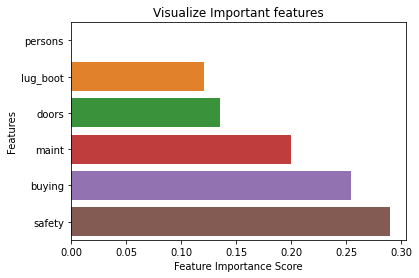

In [38]:
#creating a seaborn bar plot

sns.barplot(x=feature_score, y=feature_score.index)


#Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualize Important features")
plt.show()

## BUILD THE RANDOM FOREST MODEL ON SELECTED FEATURES

In [39]:
#Declare feature vector and target variable

x=df.drop(['class', 'doors'], axis=1)
y=df['class']

In [40]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=42)


In [51]:
import category_encoders as ce

# Instantiate the encoder
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

# Fit the encoder on the training data and transform it
x_train = encoder.fit_transform(x_train)

# Use the already fitted encoder to transform the test data
x_test = encoder.transform(x_test)


ValueError: X does not contain the columns listed in cols

In [46]:
#instantiate the classifier with n_estimators=100
clf=RandomForestClassifier(random_state=0)

#fit the model to the training set
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)

print('Model accuracy score with doors variable removed: {0:0.4f}'.format(accuracy_score(y_test, y_pred))

SyntaxError: unexpected EOF while parsing (3172057781.py, line 9)

In [48]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
print('Cconfusion matrix \n\n', cm)

print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [571, 519]